<a href="https://colab.research.google.com/github/mirchandani-mohnish/price_predictor/blob/dev/src/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Defining Libraries used

from google.colab import files 
uploaded = files.upload()
#Uploading raw data sets

# from google.colab import files 
# uploaded = files.upload()
# #Uploading raw data sets

#Read the data
train = pd.read_csv("Train_dataset.csv")
#test = pd.read_csv("test_dataset.csv")







Saving Train_dataset.csv to Train_dataset (2).csv


In [4]:

## currently testing on one dataset

# copying train and data simplification

price_v_house = train
price_v_house.drop(train.iloc[:, 1:71], inplace = True, axis = 1)
price_v_house.head() #print data

#take average
price_mean = price_v_house['SalePrice'].mean()
#print(price_mean)

price_v_house['deviation_mean'] = price_v_house['SalePrice'] - price_mean
price_v_house.head()

,Unnamed: 0,SalePrice,deviation_mean
0,0,12.247694,0.223221
1,1,12.109011,0.084537
2,2,12.317167,0.292693
3,3,11.849398,-0.175076
4,4,12.429216,0.404743


In [5]:
price_v_house['squared_dev'] = price_v_house['deviation_mean']**2
price_v_house.head()

,Unnamed: 0,SalePrice,deviation_mean,squared_dev
0,0,12.247694,0.223221,0.049828
1,1,12.109011,0.084537,0.007147
2,2,12.317167,0.292693,0.085669
3,3,11.849398,-0.175076,0.030652
4,4,12.429216,0.404743,0.163817


In [8]:
total_var = price_v_house['deviation_mean'].sum()

# Now we need to find the unexplained variance
# the difference of both i.e. (total_var - unexplained_var)/total_var = r-squared
# After this we form a regression line to predict further prices 


# make a line y = mx + c 
def fit_slope(xd, yd):
  fit_slp = ((xd.mean())*(yd.mean()) - (xd*yd).mean())/((xd**2).mean() - ((yd**2).mean()))
  return fit_slp



m = fit_slope(price_v_house['Unnamed: 0'],price_v_house['SalePrice'])
m


6.75548301289005e-06

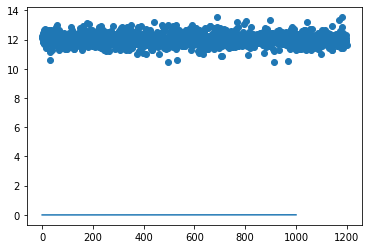

In [27]:
#plotting the line
x = np.linspace(0,1000,5)
plt.plot(x,m*x)
plt.scatter(price_v_house['Unnamed: 0'],price_v_house['SalePrice'])